# Blue Screen
---

[Chroma key compositing](https://en.wikipedia.org/wiki/Chroma_key), or chroma keying, is a visual-effects and post-production technique for compositing (layering) two images or video streams together based on colour hues (chroma range). The technique has been used in many fields to remove a background from the subject of a photo or video – particularly the newscasting, motion picture, and video game industries. A colour range in the foreground footage is made transparent, allowing separately filmed background footage or a static image to be inserted into the scene.

This technique is also referred to as colour keying, colour-separation overlay, or by various terms for specific colour-related variants such as green screen or blue screen; chroma keying can be done with backgrounds of any colour that are uniform and distinct, but green and blue backgrounds are more commonly used because they differ most distinctly in hue from any human skin colour. 

In the following notebook, you will change the blue background of an image to another one.

<tr>
<td> <img src="../Notebooks/images/pizza_bluescreen.jpg" alt="Pizza blue background" style="width: 500px;"/> </td>
<td> <img src="../Notebooks/images/pizza_newbackground.png" alt="Pizza new background" style="width: 500px;"/> </td>
</tr>

### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print(f'This image has the following dimensions {image.shape}:')

This image has the following dimensions (514, 816, 3):


A good practice is to always work on copies of the images you are going to process. Since all images are matrices (numpy arrays), we can use the [numpy.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) method to create a copy of the image.

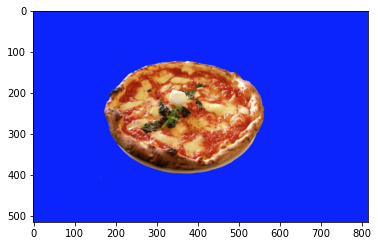

In [3]:
# Make a copy of the image using np.copy
image_copy = np.copy(image)

# Change color to RGB, from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_RGB2BGR)

# Display the image copy<
plt.imshow(image_copy)

### Define the color threshold

To remove the background, we need to remove all pixels that fall within a specific range of values. Since colors in images are rarely "pure" (for example, for blue, exactly (0, 0, 255)), we have to define a range of blue colors to detect. We need a lower and an upper boundary of blue colors before we can remove the background.

In [4]:
# Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,165]) 
upper_blue = np.array([67,67,255])

### Create a mask

With the color bounds, we can create a mask. A mask is a filter that tells us of a specific region of interest in an image. In this case, we are going to create a new image whose pixels will depend on the area we want to remove from the original image. All blue pixels that are within the boundaries we defined will be white, while the rest of the pixels will be black. 

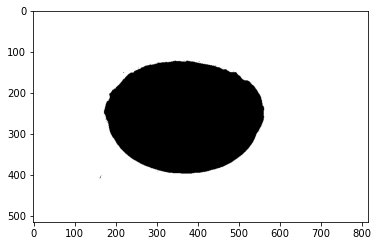

In [5]:
# Create a new image that has the same shape as the original image
height, width, colors = image_copy.shape
mask = np.zeros(shape=(height, width, colors), dtype='uint8') 

# Loop through all the pixels of the pizza image, and change the pixels in the mask accordingly.
for indexone in range(height):
    for indextwo in range(width):
        change = True
        for index3 in range(3):
            if not (image_copy[indexone, indextwo, index3] > lower_blue[index3] and image_copy[indexone, indextwo, index3] <= upper_blue[index3]):
                change = False
        if change:
            mask[indexone, indextwo, :] = [255, 255, 255]
                
# Vizualize the mask
plt.imshow(mask, cmap='gray')

### Applying the mask

With the mask ready, we can use it to "mask" specific areas of any given image. In this case, the blue pixels (if we match the white pixels of the mask), or the pixels that form the pizza (if we match the black pixels of the mask). The next function applies the mask depending on the color we tell it to "mask". 

In [6]:
def apply_mask(mask, image, color):
    """
    Applies a mask to an image depending on the color to mask.

    Parameters
    ----------
    mask: 
        The image that contains the mask that will be applied
    image:
        The image that will be masked.
    color:
        The color that will be matched on the mask.
    """
    # Create a new image that is the same shape as the image
    image_result = np.zeros(image.shape, dtype="uint8")
    
    # Loop through the image's pixels, and "mask" all the pixels that match the specified color on the same spot of the mask image.
    for indexone in range(height):
        for indextwo in range(width):
            if np.array_equal(color, mask[indexone, indextwo, :]):
                image_result[indexone, indextwo, :] = image[indexone, indextwo, :]
                
    return image_result

Once you have implemented the function, use the next cells to test your code!

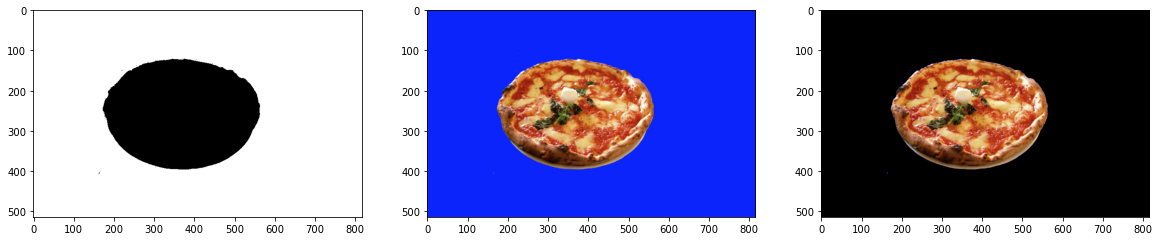

In [7]:
# Mask the image to let the pizza show through
masked_image = apply_mask(mask, image_copy, [0,0,0])

# Display it!
f, (mask_ax, image_ax, masked_ax) = plt.subplots(1, 3, figsize=(20,10))
mask_ax.imshow(mask)
image_ax.imshow(image_copy)
masked_ax.imshow(masked_image)

### Mask and add a background image

With the pizza image without the background, now we need to remove the pizza from the space background. Use the function you completed previously to achieve this. 

However, before we can remove the pizza from the space image, we need to do some pre-processing on the background. In this case, the pizza image and the space background do not have the same size. Check [OpenCV's resize function](https://docs.opencv.org/4.5.5/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) to see how to resize an image. Then use the previously defined function to remove the pizza from the background.

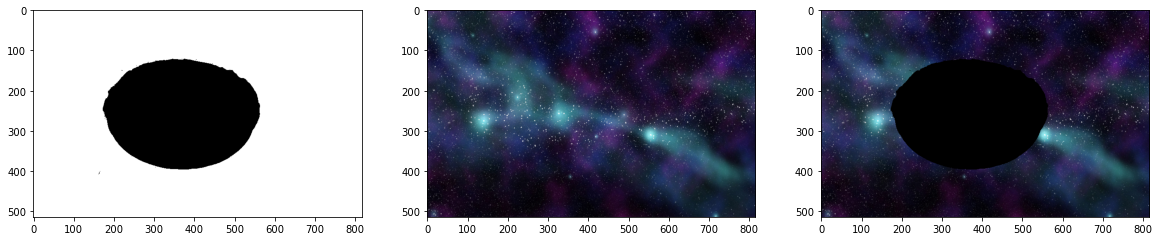

In [8]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread("./images/space_background.jpg")
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Resize the background to match the size of the image
bkg_resize = cv2.resize(background_image, (image_copy.shape[1], image_copy.shape[0]))

# Mask the cropped background so that the pizza area is blocked
masked_background = apply_mask(mask, bkg_resize, [255, 255, 255])

# Display the background
f, (mask_ax, image_ax, masked_ax) = plt.subplots(1, 3, figsize=(20,10))
mask_ax.imshow(mask)
image_ax.imshow(bkg_resize)
masked_ax.imshow(masked_background)

### Create a complete image

Once you have the masked image, and the masked background, simply add them to see the result!

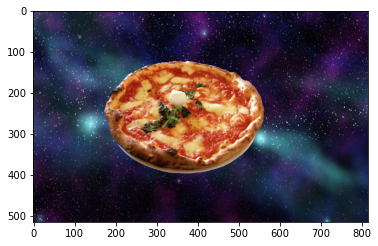

In [9]:
# Add the two images together to create a complete image!
complete_image = masked_image + masked_background

# Display the result
plt.imshow(complete_image)